### Score: `[29]`

Q1. `[11]` good job。

Q2. `[18]` please use different project, missing annotations, and text box

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [5]:
df = pd.read_csv('usgs_earthquakes.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


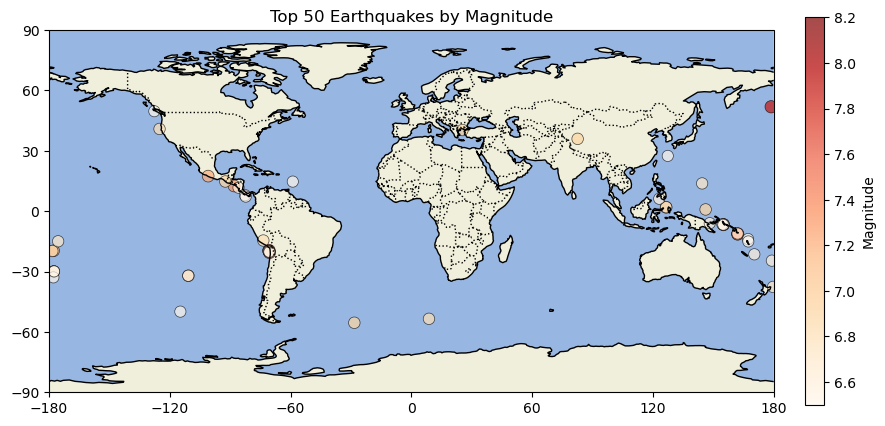

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
df = pd.read_csv('usgs_earthquakes.csv')

#筛选出震级前50的地震点
top_50 = df.nlargest(50, 'mag')

#绘制地图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#设置地图范围，通过文件给出经纬度的最大最小值来确定图像的范围
ax.set_extent([df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()])

#绘制前五十的地震点，震级越大，点越大，颜色越深
sizes = top_50['mag'] * 10  #可以根据需要调整比例
colors = top_50['mag']  #可以根据需要调整颜色映射

#绘制散点
scatter = ax.scatter(top_50['longitude'], top_50['latitude'],
                     c=colors, s=sizes, cmap='OrRd', alpha=0.7,
                     edgecolor='k', linewidth=0.5)

#添加颜色条
cbar = plt.colorbar(scatter, ax=ax, label='Magnitude', fraction=0.025, pad=0.04)

#在图框边缘添加经纬度标签
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

#添加标题
plt.title('Top 50 Earthquakes by Magnitude')

plt.show()

In [25]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
#利用上次作业第三题的文件
ds = xr.open_dataset('output_file.nc4')
ds

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 2015-02-15 ... 2022-02-15
Data variables:
    XCO2     (time, lat, lon) float64 ...

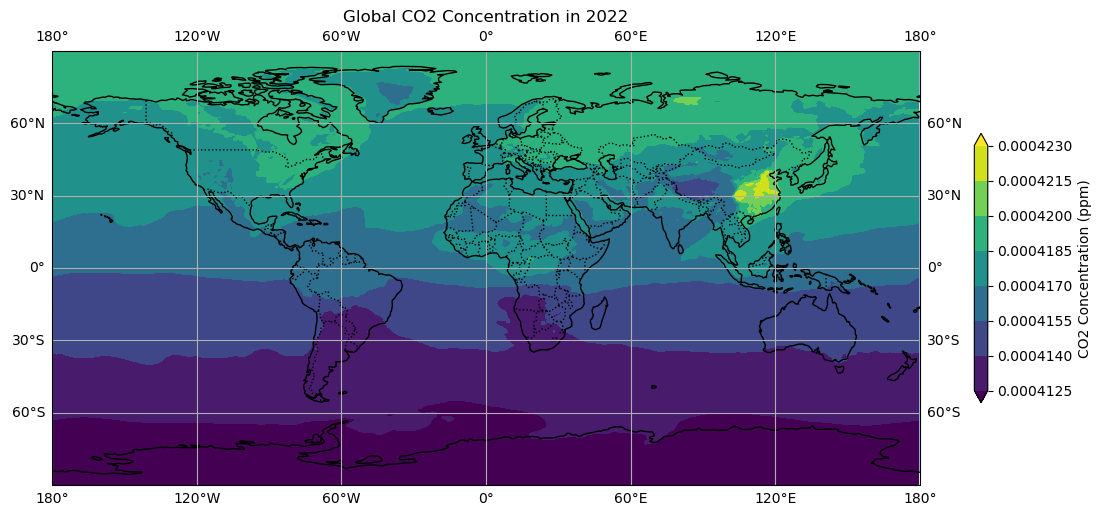

In [47]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
ds = xr.open_dataset('output_file.nc4')

#选择2022年的数据
data_2022 = ds.sel(time=ds.time.dt.year == 2022)

#XCO2变量的有第三个维度是时间，我们选择第一个时间点的数据，isel方法的参数0, 0, 0分别代表时间、经度和纬度的第一个切片
data_2022_slice = data_2022.isel(time=0)

#绘制全球地图
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#设置地图范围
ax.set_extent([-180, 180, -90, 90])

#绘制二氧化碳浓度
contourf = ax.contourf(data_2022_slice['lon'], data_2022_slice['lat'], data_2022_slice['XCO2'].values, 
                      transform=ccrs.PlateCarree(), cmap='viridis', extend='both')

#添加颜色条
cbar = plt.colorbar(contourf, ax=ax, shrink=0.5, orientation='vertical')
cbar.set_label('CO2 Concentration (ppm)')

#添加网格线
ax.gridlines(draw_labels=True)

#添加标题和标签
ax.set_title('Global CO2 Concentration in 2022')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 显示地图
plt.show()

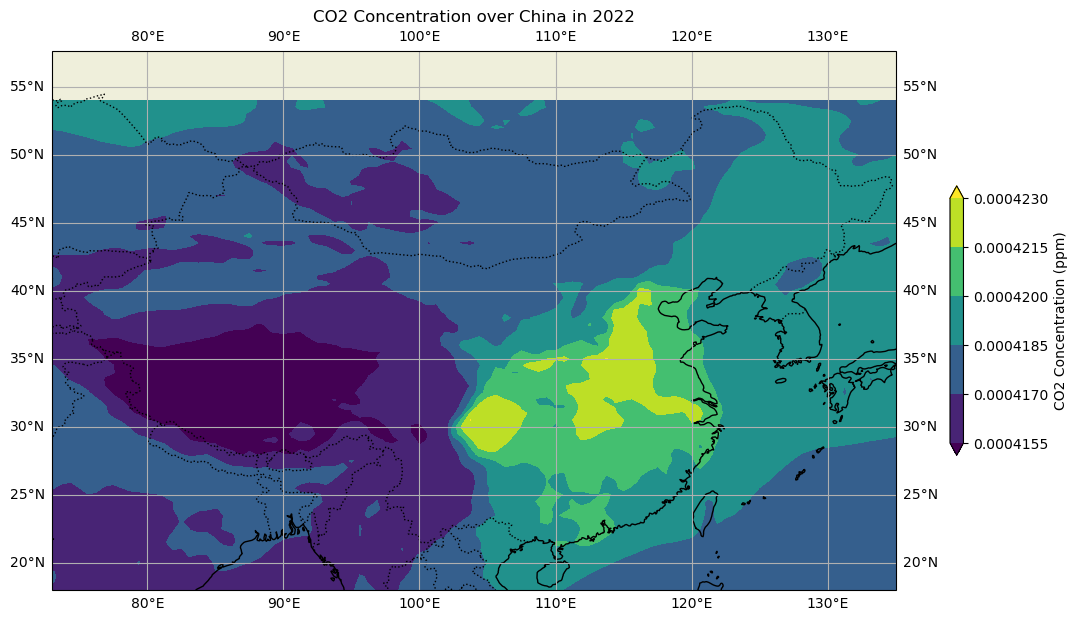

In [45]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
ds = xr.open_dataset('output_file.nc4')

#选择2022年的数据
data_2022 = ds.sel(time=ds.time.dt.year == 2022)

#同上题操作将数据减少时间维度
data_2022_slice = data_2022.isel(time=0)

#选择中国所在的经纬度范围
china_extent = [73, 135, 18, 54]  # [min_lon, max_lon, min_lat, max_lat]

#绘制地图
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

#设置地图范围为中国区域
ax.set_extent(china_extent)

#选择中国区域内的数据
china_data = data_2022_slice.sel(lon=slice(china_extent[0], china_extent[1]), 
                                 lat=slice(china_extent[2], china_extent[3]))

#绘制二氧化碳浓度
contourf = ax.contourf(china_data['lon'], china_data['lat'], china_data['XCO2'].values, 
                      transform=ccrs.PlateCarree(), cmap='viridis', extend='both')

#添加颜色条
cbar = plt.colorbar(contourf, ax=ax, shrink=0.5, orientation='vertical')
cbar.set_label('CO2 Concentration (ppm)')

#添加网格线
ax.gridlines(draw_labels=True)

#添加标题和标签
ax.set_title('CO2 Concentration over China in 2022')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#显示地图
plt.show()